In [1]:
%cd /content/drive/My Drive/Projects/Handwriting recognizer/Code/

/content/drive/My Drive/Projects/Handwriting recognizer/Code


In [3]:
!pip install tf2cv

In [7]:
import config
from model import resnet_rnn,baseline,vgg_extractor,vgg_11_extractor
from data import encode_single_file,preprocess_label
import argparse 
from glob import glob
import numpy as np 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from decode import ctc_to_text
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.models import Model
import cv2 
import matplotlib.pyplot as plt
"""parser=argparse.ArgumentParser()
parser.add_argument('--in_dir',default=config.img_dir,help='The directory where the cropped pictures are stored')
args=parser.parse_args()"""

image_files=np.array(sorted(glob(f'{config.img_dir}*.jpg')))
labels=[i.split('_')[-1].split('.')[0] for i in image_files]
label_lens=np.array([len(i) for i in labels])
n_classes=len(config.vocab)+1

reverse_tokenizer=layers.experimental.preprocessing.StringLookup(vocabulary=config.vocab,invert=True)

In [8]:
train_data=tf.data.Dataset.from_tensor_slices((image_files,labels,label_lens))
train_data=(train_data.map(
  encode_single_file,num_parallel_calls=tf.data.experimental.AUTOTUNE).
  batch(1)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
  )

In [5]:
model=vgg_11_extractor(config.input_shape,n_classes=n_classes)
model.load_weights(config.model_dir+f'baseline_1.hdf5')
model=Model(inputs=[model.get_layer('image').input],outputs=[model.get_layer('dense2').output])

[45 45 35 27]
ममता
(1, 540, 240, 3)
(16, 98)
['ममता']
['़़इब[UNK]']
tf.Tensor([[ 9  9 23 33 -1]], shape=(1, 5), dtype=int64)
['ममता']


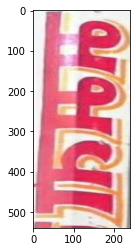

In [11]:



for batch in train_data.take(1):
  images=batch['image'].numpy()
  labels=batch['label'].numpy()
  results=[]
  for label in labels:
    print(label) 
    label=tf.strings.reduce_join(reverse_tokenizer(label)).numpy().decode("utf-8")
    print(label)
    results.append(label)
  print(images.shape)
  preds=model.predict(images)
  print(preds[0].shape)
  txt,res=ctc_to_text(preds,reverse_tokenizer)
  print(results)
  print(txt)
  print(res)
  break 

plt.imshow(images[0][:,:,:],cmap='gray')
print(results)

In [89]:
#label=tokenizer(tf.strings.unicode_split(labels[0],input_encoding='UTF-8')) 
label=np.array([45,45,35,27])
label=tf.strings.reduce_join(reverse_tokenizer(label)).numpy().decode("utf-8")
print(label)

ममता


In [32]:
reqd=encode_single_file(image_files[2],labels[2],label_lens[2])
reqd['image']=reqd['image'].numpy() #[np.newaxis,:,:,:]
reqd['image'].shape

InvalidArgumentError: ignored

In [16]:
model=vgg_11_extractor(config.input_shape,n_classes=n_classes)
model.load_weights(config.model_dir+f'baseline_1.hdf5')
model=Model(inputs=[model.get_layer('image').input],outputs=[model.get_layer('dense2').output])
preds=model.predict(reqd['image'])
txt,res=ctc_to_text(preds,reverse_tokenizer)
print(txt)

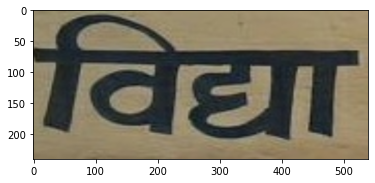

In [26]:
plt.imshow(reqd['image'][0].transpose(1,0,2))

In [22]:
reqd['image'][0].T

array([[[0.5803922 , 0.5803922 , 0.5794118 , ..., 0.66176474,
         0.6627451 , 0.6627451 ],
        [0.58026963, 0.58026963, 0.5792586 , ..., 0.6618873 ,
         0.66286767, 0.66286767],
        [0.5788807 , 0.5788807 , 0.5775225 , ..., 0.6632762 ,
         0.6642566 , 0.6642566 ],
        ...,
        [0.5294118 , 0.5294118 , 0.52925855, ..., 0.5852124 ,
         0.5852124 , 0.5852124 ],
        [0.5294118 , 0.5294118 , 0.53030026, ..., 0.5879902 ,
         0.5879902 , 0.5879902 ],
        [0.5294118 , 0.5294118 , 0.53039217, ..., 0.5882353 ,
         0.5882353 , 0.5882353 ]],

       [[0.5372549 , 0.5372549 , 0.53627455, ..., 0.58725494,
         0.5882353 , 0.5882353 ],
        [0.5371324 , 0.5371324 , 0.53612137, ..., 0.5873775 ,
         0.58835787, 0.58835787],
        [0.5357435 , 0.5357435 , 0.53438526, ..., 0.5887664 ,
         0.5897468 , 0.5897468 ],
        ...,
        [0.47058827, 0.47058827, 0.47043508, ..., 0.49501634,
         0.49501634, 0.49501634],
        [0.4